In [ ]:
# Load libraries
from pandas import read_excel
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
# Load dataset
#url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
#names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = read_excel("/content/gdrive/MyDrive/Sagnik DS/Final_Data_all-Cat.xlsx")
#dataset.fillna(0)
#dataset.replace([np.inf, -np.inf], np.nan)
#dataset.drop('Thumb Flex',axis='columns', inplace=True)

In [ ]:
# shape
print(dataset.shape)

(15352, 11)


In [ ]:
# head
print(dataset.head(150))

     Index Pressure   Middle Pressure  ...  Thenar Pressure  Material_Grip
0                18                 9  ...               22      SOFT_SOFT
1                33                 8  ...               28      SOFT_SOFT
2                33                 8  ...               33      SOFT_SOFT
3                33                 8  ...               34      SOFT_SOFT
4                33                 9  ...               49      SOFT_SOFT
..              ...               ...  ...              ...            ...
145              32                 9  ...                7      SOFT_SOFT
146              34                 9  ...                9      SOFT_SOFT
147              33                 9  ...                9      SOFT_SOFT
148              33                 9  ...               16      SOFT_SOFT
149              33                10  ...               29      SOFT_SOFT

[150 rows x 11 columns]


In [ ]:
# descriptions
print(dataset.describe())

NameError: ignored

In [ ]:
# class distribution
print(dataset.groupby('Material_Grip').size())

Material_Grip
HARDER_HARD      1798
HARDER_HARDER    1779
HARDER_SOFT      1851
HARD_HARD        2217
HARD_HARDER      1288
HARD_SOFT        1285
SOFT_HARD        1642
SOFT_HARDER      1712
SOFT_SOFT        1780
dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

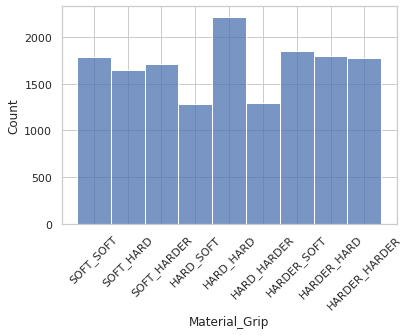

In [ ]:
# box and whisker plots
import seaborn as sns
sns.histplot(data=dataset, x="Material_Grip")
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

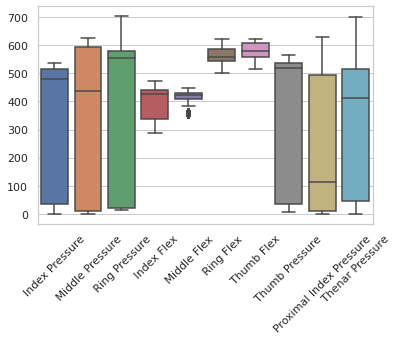

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
#ax = sns.boxplot(x="Index Pressure", y="Material_Grip", hue="Material_Grip", data=dataset, palette="Set3")
#ax = sns.barplot(x="Material_Grip", y="Thenar Pressure", data=dataset, palette="Set3")
ax = sns.boxplot(data=dataset)
plt.xticks(rotation=45)
#ax.set_xticklabels(rotation=45)
#sns.displot(dataset, x="Index Pressure", discrete=True)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


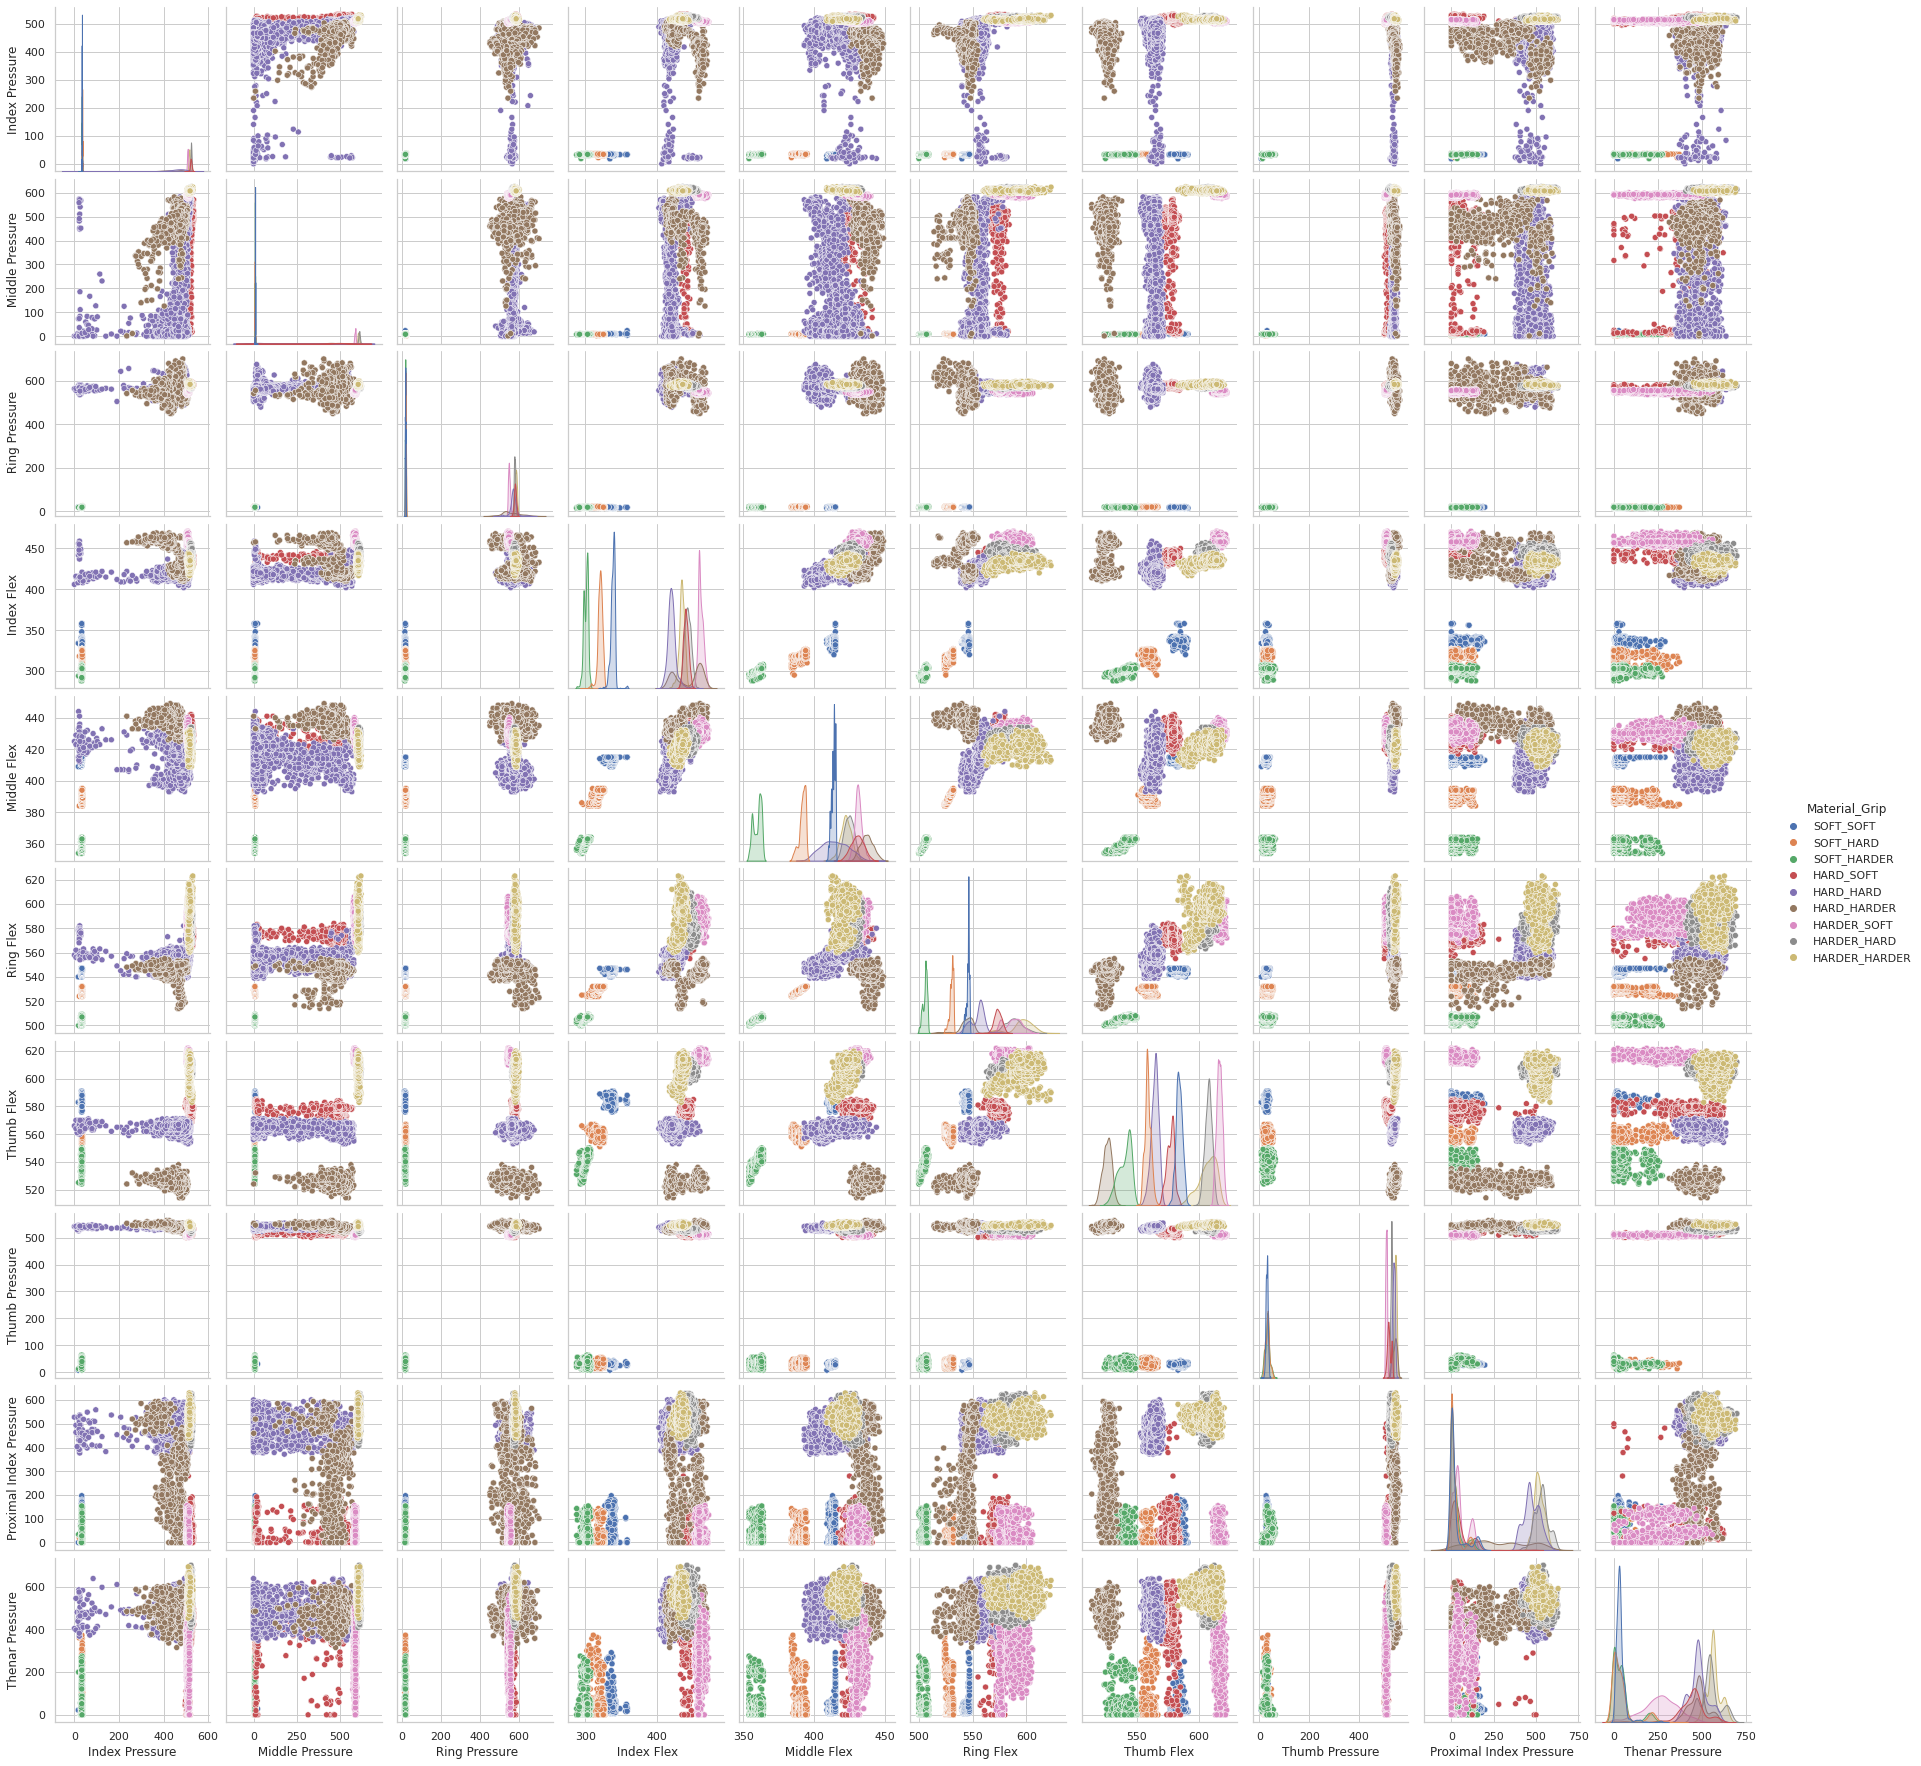

In [ ]:
sns.pairplot(dataset, hue='Material_Grip', size=2.5);

<Figure size 2880x1800 with 0 Axes>

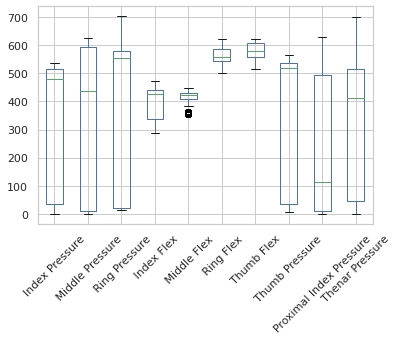

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize =(40, 25))
# Creating plot
#plt.boxplot(dataset)
dataset.plot(kind='box')  
# show plot
plt.xticks(rotation=45)
plt.show()


<Figure size 864x864 with 0 Axes>

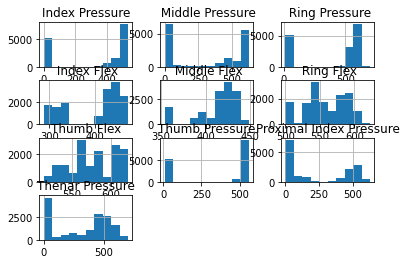

In [ ]:

# histograms
#fig = plt.figure(figsize =(15, 20))
plt.figure(figsize=(12,12),facecolor='red',edgecolor='blue')
dataset.hist()
pyplot.show()

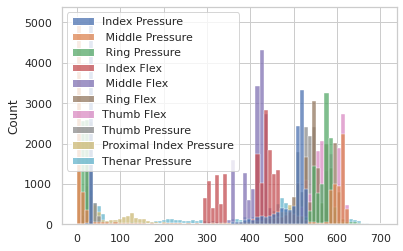

In [ ]:
#sns.histplot(data=dataset, x="Material_Grip")
sns.histplot(data=dataset)

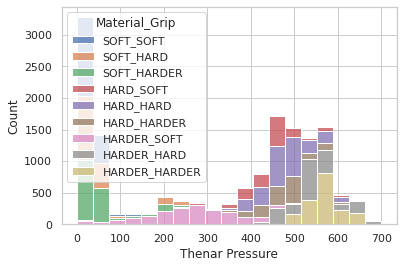

In [ ]:
sns.histplot(data=dataset, x="Thenar Pressure", hue="Material_Grip", multiple="stack")

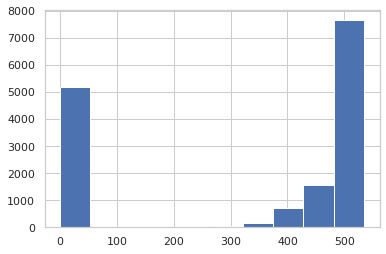

In [ ]:
dataset['Index Pressure'].hist()

In [ ]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:10]
y = array[:,10]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.30, random_state=1)

In [ ]:
print(Y_train)

['HARDER_HARD' 'SOFT_HARDER' 'HARDER_HARDER' ... 'HARDER_HARD' 'SOFT_SOFT'
 'HARDER_HARD']


In [ ]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=2, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))


LR: 0.995347 (0.001500)
LDA: 0.998418 (0.001383)
KNN: 0.997022 (0.002073)
CART: 0.999162 (0.000773)
NB: 1.000000 (0.000000)
SVM: 0.530988 (0.010785)


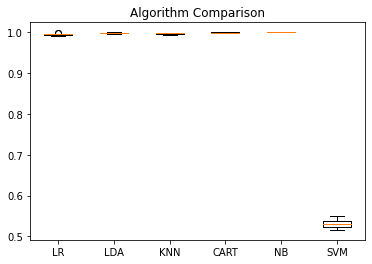

In [ ]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model = model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
from sklearn import svm
model = svm.SVC()
model = model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
from sklearn.multiclass import OutputCodeClassifier
from sklearn.svm import LinearSVC
model = OutputCodeClassifier(LinearSVC(random_state=0),code_size=2, random_state=0)
model = model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [ ]:
# Make predictions on validation dataset
#model = SVC(gamma='auto')
#model = SVC()
#model = GaussianNB()
#model = DecisionTreeClassifier()
#model=KNeighborsClassifier()
#model=LinearDiscriminantAnalysis()
model= LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9960920538428137
[[560   1   0   0   0   0   0   0   0]
 [  1 525   0   0   0   0   0   0   0]
 [  0   0 564   0   0   0   0   0   0]
 [  0   8   0 630   4   0   0   0   1]
 [  0   0   0   1 381   0   0   0   0]
 [  0   0   0   0   0 364   0   0   0]
 [  0   0   0   0   0   0 508   0   2]
 [  0   0   0   0   0   0   0 518   0]
 [  0   0   0   0   0   0   0   0 538]]
               precision    recall  f1-score   support

  HARDER_HARD       1.00      1.00      1.00       561
HARDER_HARDER       0.98      1.00      0.99       526
  HARDER_SOFT       1.00      1.00      1.00       564
    HARD_HARD       1.00      0.98      0.99       643
  HARD_HARDER       0.99      1.00      0.99       382
    HARD_SOFT       1.00      1.00      1.00       364
    SOFT_HARD       1.00      1.00      1.00       510
  SOFT_HARDER       1.00      1.00      1.00       518
    SOFT_SOFT       0.99      1.00      1.00       538

     accuracy                           1.00      4606
    macro avg       1.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

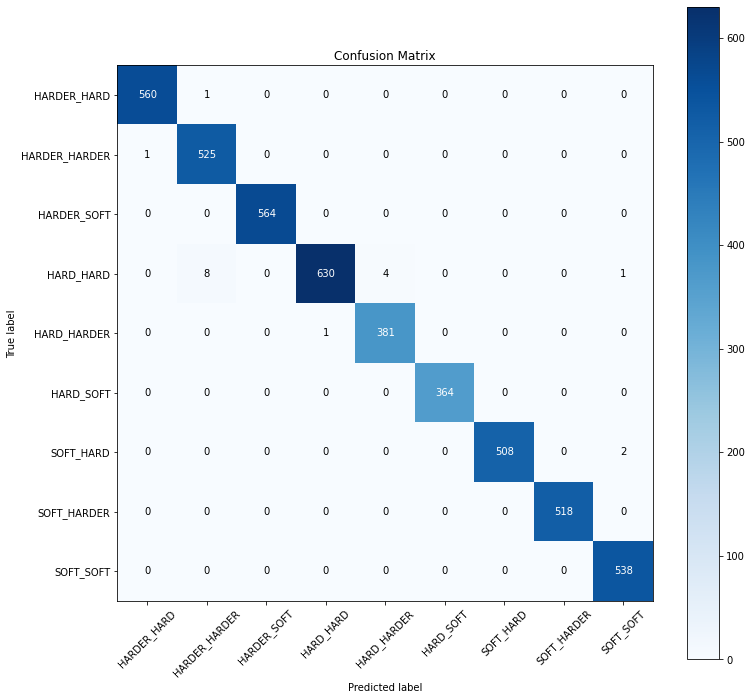

In [ ]:
#! pip install -q scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_validation, predictions,figsize=(12,12))
plt.xticks(rotation=45)

In [ ]:
Xnew = [[55, 587, 452, 462, 430, 585, 619, 507, 127, 380]]
ynew = model.predict(Xnew)
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[55, 587, 452, 462, 430, 585, 619, 507, 127, 380], Predicted=HARD_HARDER
